# Mall Customer Segmentation

Goal: Group customers into clusters based on their annual income and spending score.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

In [14]:
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Load and Explore the Data

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Visualization

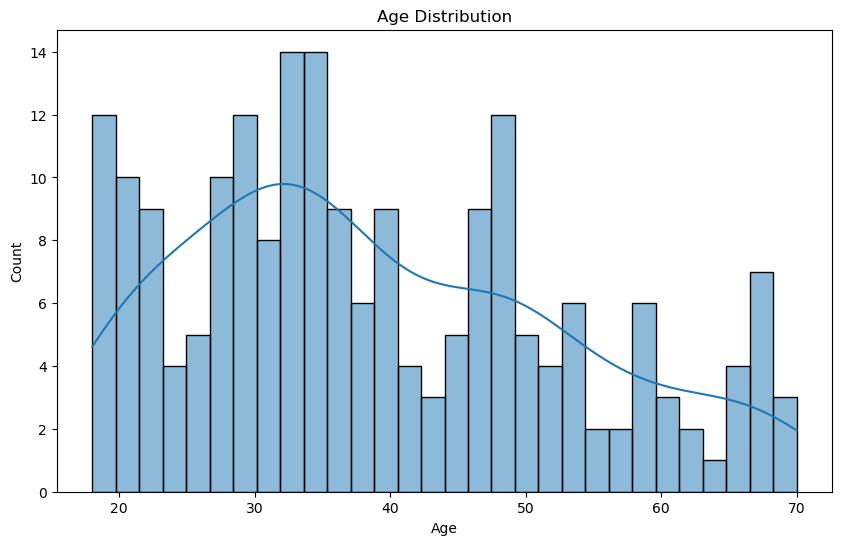

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

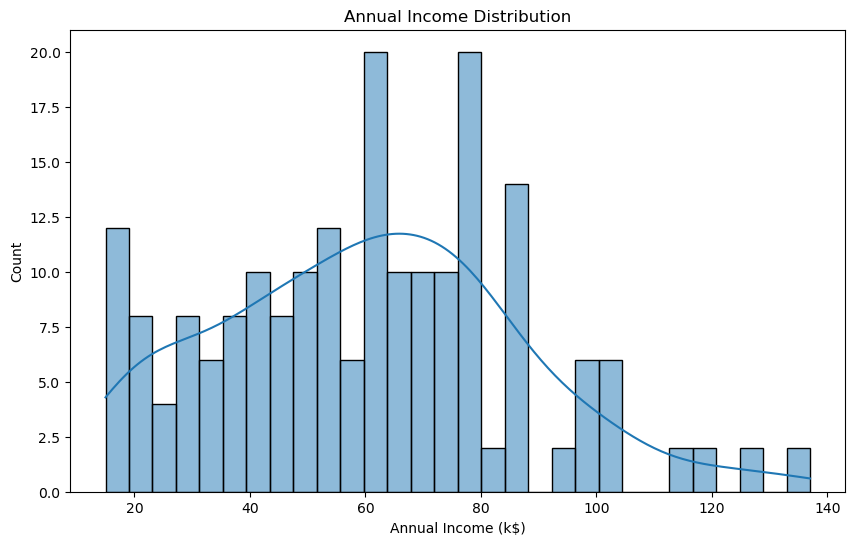

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()


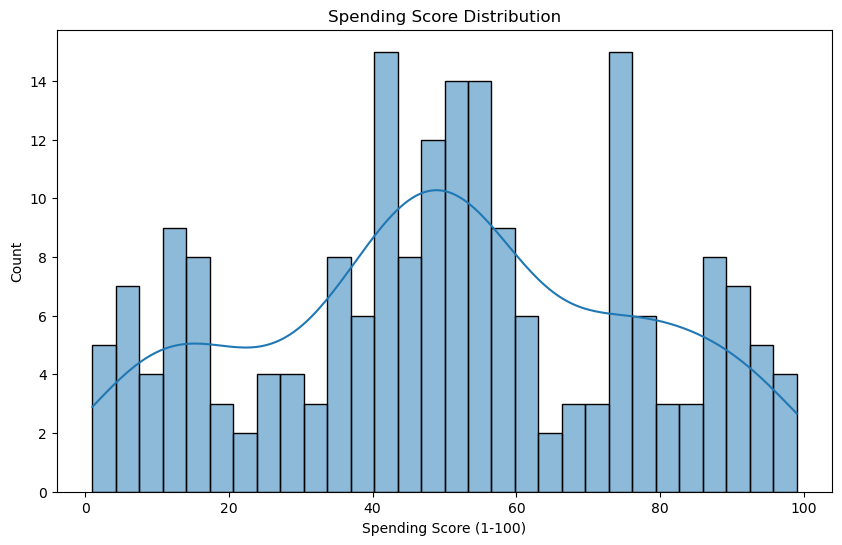

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

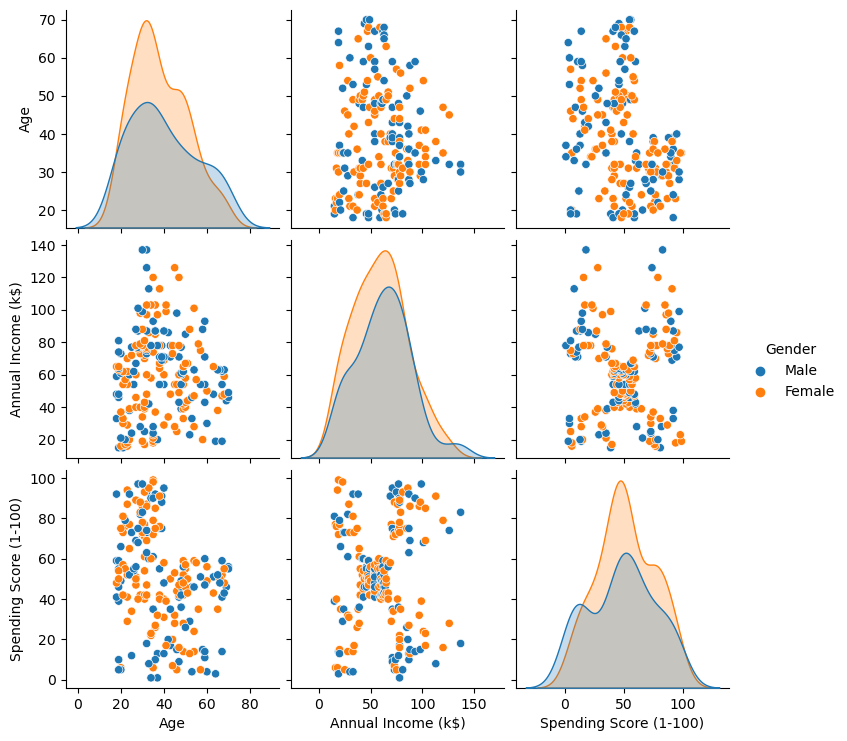

In [18]:
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender')
plt.show()

# Feature Selection

In [19]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Finding the Optimal Number of Clusters

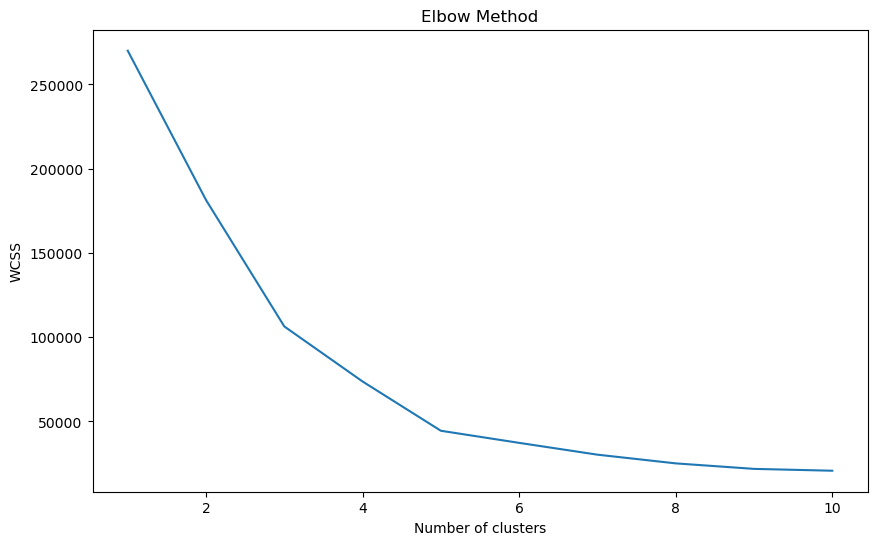

In [22]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Applying KMeans Clustering

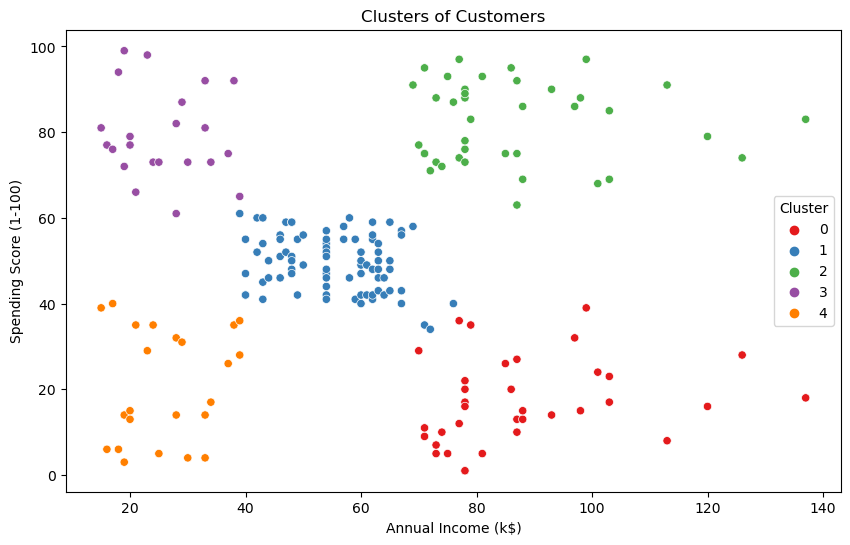

In [25]:

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

data['Cluster'] = y_kmeans

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


# Analyzing the Clusters

In [26]:
# Analyze cluster characteristics
for i in range(5):
    print(f"Cluster {i}")
    print(data[data['Cluster'] == i].describe())
    print("\n")


Cluster 0
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   35.000000  35.000000           35.000000               35.000000   
mean   164.371429  41.114286           88.200000               17.114286   
std     21.457325  11.341676           16.399067                9.952154   
min    125.000000  19.000000           70.000000                1.000000   
25%    148.000000  34.000000           77.500000               10.000000   
50%    165.000000  42.000000           85.000000               16.000000   
75%    182.000000  47.500000           97.500000               23.500000   
max    199.000000  59.000000          137.000000               39.000000   

       Cluster  
count     35.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  


Cluster 1
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               8